In [2]:
pip install yfinance

[*********************100%%**********************]  1 of 1 completed


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-02-15  153.110001  155.500000  152.880005  155.330002  154.505310   
2023-02-16  153.509995  156.330002  153.350006  153.710007  152.893906   
2023-02-17  152.350006  153.000000  150.850006  152.550003  151.740051   
2023-02-21  150.199997  151.300003  148.410004  148.479996  147.691666   
2023-02-22  148.869995  149.949997  147.160004  148.910004  148.119400   

              Volume    change  instant_return  
Date                                            
2023-02-15  65573800  0.000000          0.0000  
2023-02-16  68167900 -1.619995         -0.0105  
2023-02-17  59144100 -1.160004         -0.0076  
2023-02-21  58867200 -4.070007         -0.0270  
2023-02-22  51011300  0.430008          0.0029  


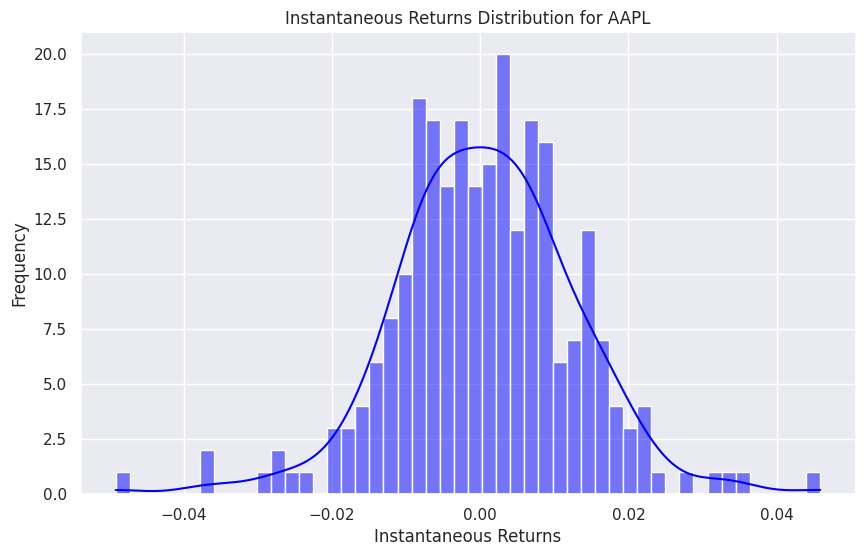

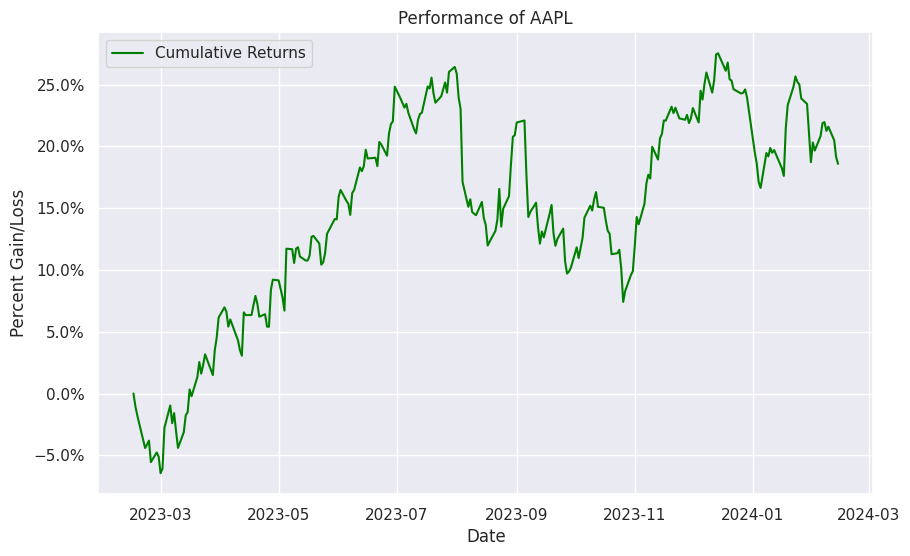

In [4]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import yfinance as yf

# Optional: Set seaborn theme for better aesthetics
sns.set_theme()

DEFAULT_START = dt.date.isoformat(dt.date.today() - dt.timedelta(365))
DEFAULT_END = dt.date.isoformat(dt.date.today())

class Stock:
    def __init__(self, symbol, start=DEFAULT_START, end=DEFAULT_END):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.data = self.get_data()

    def get_data(self):
        """method that downloads data and stores in a DataFrame"""
        df = yf.download(self.symbol, start=self.start, end=self.end)
        df.index = pd.to_datetime(df.index)  # Ensure the index is a Datetime object
        self.calc_returns(df)
        return df

    def calc_returns(self, df):
        """Method that adds change and instant_return columns to data"""
        df['change'] = df['Close'].diff()
        df['instant_return'] = np.log(df['Close']).diff().round(4)
        df.fillna(0, inplace=True)  # Handle any NaN values by filling with 0

    def plot_return_dist(self):
        """Method that plots instantaneous returns as histogram"""
        plt.figure(figsize=(10, 6))
        sns.histplot(self.data['instant_return'], bins=50, kde=True, color='blue')
        plt.title(f'Instantaneous Returns Distribution for {self.symbol}')
        plt.xlabel('Instantaneous Returns')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

    def plot_performance(self):
        """Method that plots stock object performance as percent"""
        cumulative_returns = (np.exp(self.data['instant_return'].cumsum()) - 1) * 100
        plt.figure(figsize=(10, 6))
        plt.plot(cumulative_returns, label='Cumulative Returns', color='green')
        plt.title(f"Performance of {self.symbol}")
        plt.xlabel("Date")
        plt.ylabel("Percent Gain/Loss")
        plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
        plt.legend()
        plt.grid(True)
        plt.show()

# Test the class
if __name__ == '__main__':
    symbol = "AAPL"  # Example stock symbol
    test_stock = Stock(symbol=symbol)
    print(test_stock.data.head())  # Print first few rows of the data
    test_stock.plot_return_dist()  # Plot the return distribution
    test_stock.plot_performance()  # Plot the performance over time
